In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing_utils import rotate_points, set_pia_zero

#### Original area bounds

In [2]:
RL_bounds = np.load('data/RL_bounds.npy')
AL_bounds = np.load(
    'data/AL_bounds.npy',
)
V1_bounds = np.load('data/V1_bounds.npy')

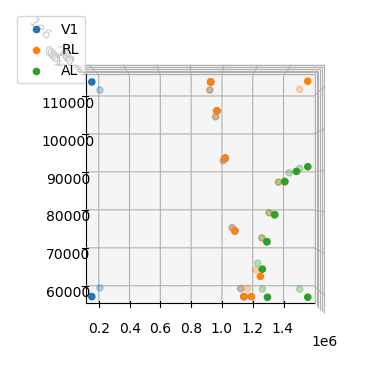

In [3]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(*V1_bounds[:, [0, 2, 1]].T, label='V1')
ax.scatter(*RL_bounds[:, [0, 2, 1]].T, label='RL')
ax.scatter(*AL_bounds[:, [0, 2, 1]].T, label='AL')

ax.invert_zaxis()
ax.view_init(90, -90)

plt.legend()

#### Topdown bounds

In [4]:
RL_bounds = np.load('data/topdown_RL_bounds.npy')
AL_bounds = np.load('data/topdown_AL_bounds.npy')

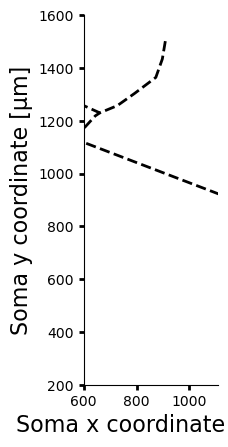

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(
    RL_bounds[:, 1],
    RL_bounds[:, 0],
    '--',
    label='RL_bounds',
    color='black',
    linewidth=2,
)
ax.plot(
    AL_bounds[:, 1],
    AL_bounds[:, 0],
    '--',
    label='AL_bounds',
    color='black',
    linewidth=2,
)
ax.set_aspect('equal')

ax.set_xlabel('Soma x coordinate [μm]', fontsize=16)
ax.set_ylabel('Soma y coordinate [μm]', fontsize=16)
ax.set_xlim([600, 1110])
ax.set_ylim([200, 1600])
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
sns.despine()

#### Align bounds to x-axis

In [6]:
deg = 14

In [7]:
RL_bounds_align = np.stack(
    [RL_bounds[:, 0], np.zeros(len(RL_bounds)), RL_bounds[:, 1]], axis=1
)
AL_bounds_align = np.stack(
    [AL_bounds[:, 0], np.zeros(len(AL_bounds)), AL_bounds[:, 1]], axis=1
)

In [8]:
RL_bounds_align = rotate_points(RL_bounds_align, axis=1, degree=deg)[:, [0, 2]]
AL_bounds_align = rotate_points(AL_bounds_align, axis=1, degree=deg)[:, [0, 2]]

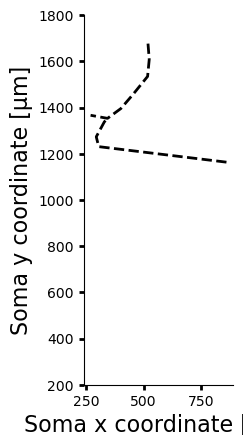

In [9]:
fig, ax = plt.subplots(1, 1)

ax.plot(
    RL_bounds_align[:, 1],
    RL_bounds_align[:, 0],
    '--',
    label='RL_bounds',
    color='black',
    linewidth=2,
)
ax.plot(
    AL_bounds_align[:, 1],
    AL_bounds_align[:, 0],
    '--',
    label='AL_bounds',
    color='black',
    linewidth=2,
)
ax.set_aspect('equal')

ax.set_xlabel('Soma x coordinate [μm]', fontsize=16)
ax.set_ylabel('Soma y coordinate [μm]', fontsize=16)
ax.set_ylim([200, 1800])
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
sns.despine()